In [1]:
# requirement libraries
import os
import numpy as np
import tensorflow as tf
from google.colab import drive

In [2]:
device_name     = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


### 2. Data Understanding

In [3]:
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
train_dir = '/content/drive/MyDrive/DogsVsCatsVsTigers/train'
test_dir = '/content/drive/MyDrive/DogsVsCatsVsTigers/test'

In [5]:
os.listdir(train_dir)

['Dogs', 'Cats', 'Tigers']

In [6]:
os.listdir(test_dir)

['Dogs', 'Tigers', 'Cats']

In [7]:
import shutil

shutil.rmtree(os.path.join(test_dir, '.ipynb_checkpoints'), ignore_errors=True)

In [8]:
os.listdir(test_dir)

['Dogs', 'Tigers', 'Cats']

In [9]:
os.listdir(train_dir+"/Dogs")

['traindog1.jpeg',
 'traindog2.jpeg',
 'traindog3.jpeg',
 'traindog4.jpeg',
 'traindog5.jpeg']

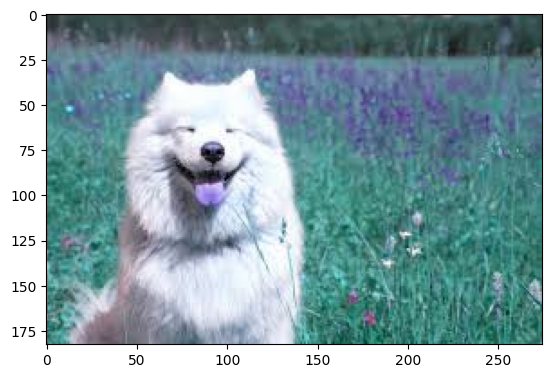

In [10]:
import cv2
image = cv2.imread(train_dir+"/Dogs"+"/traindog2.jpeg")
import matplotlib.pyplot as plt
plt.imshow(image)

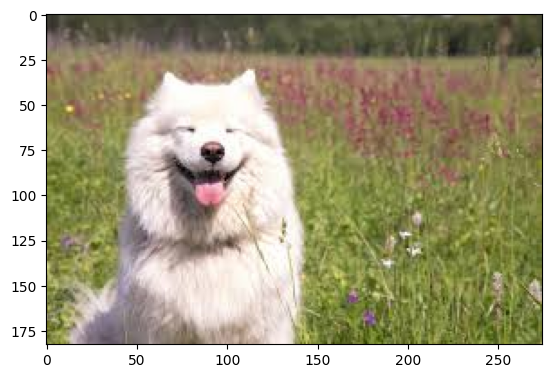

In [11]:
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)

### 3. Data Preprocessing

In [12]:
# ပုံတွေရဲ့ Range  ကို scale လုပ်တာ။
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255.
datagen_train = ImageDataGenerator( rescale = 1/255)
datagen_test  = ImageDataGenerator( rescale = 1/255)

In [13]:
batch_size = 5
train_set  = datagen_train.flow_from_directory(train_dir,
                                            target_size = (200,200),
                                            #color_mode="grayscale",
                                             batch_size = batch_size,
                                            class_mode = "categorical", #if more than 2 categories: categorical, 2 categories: binary
                                            shuffle = True)
test_set = datagen_test.flow_from_directory(test_dir,
                                       target_size = (200,200),
                                       #color_mode="grayscale",
                                       batch_size = batch_size,
                                       class_mode = "categorical",
                                       shuffle = False)

Found 15 images belonging to 3 classes.
Found 15 images belonging to 3 classes.


### 4. Modeling

In [14]:
"""model  = tf.keras.models.Sequential([
        tf.keras.layers.Flatten(input_shape = (200, 200, 3)),    #flatten က matrix table ကို row တခုထဲေပြာင်း, 3 က 3 channels RGB
        tf.keras.layers.Dense(1000, activation=tf.nn.relu),  #hidden layer 100 neurons ထား
        tf.keras.layers.Dense(500, activation=tf.nn.relu),
        tf.keras.layers.Dense(100, activation=tf.nn.relu),
        tf.keras.layers.Dense(3, activation=tf.nn.softmax) # output layers with 3 labels (neurons)
])"""

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64,(3,3),activation='relu',input_shape=(200,200,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(500, activation = 'relu'),
    tf.keras.layers.Dense(1000, activation = 'relu'),
    tf.keras.layers.Dense(3,activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
model.compile(optimizer='adam',   #result ပိုေကာင်းအောင်ထည့်တာ
              loss = 'categorical_crossentropy',
              metrics =['acc'])   #accuracy

In [16]:
num_of_training_images = 15
history = model.fit(train_set,
                    #steps_per_epoch=num_of_training_images//batch_size,  #epoch (run တဲ့အကြိမ်အရေအတွက်) တခုမှာ ၁၅ကြိမ်သွားမယ်
                    epochs=20,                   #count of runnning
                    verbose = 2,
                    shuffle = False)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
3/3 - 7s - 2s/step - acc: 0.2000 - loss: 5.6012
Epoch 2/20
3/3 - 0s - 29ms/step - acc: 0.0667 - loss: 1.1496
Epoch 3/20
3/3 - 0s - 29ms/step - acc: 0.3333 - loss: 1.1305
Epoch 4/20
3/3 - 0s - 29ms/step - acc: 0.4000 - loss: 1.0910
Epoch 5/20
3/3 - 0s - 35ms/step - acc: 0.3333 - loss: 1.0935
Epoch 6/20
3/3 - 0s - 29ms/step - acc: 0.7333 - loss: 0.9623
Epoch 7/20
3/3 - 0s - 28ms/step - acc: 0.6667 - loss: 0.7610
Epoch 8/20
3/3 - 0s - 29ms/step - acc: 0.8667 - loss: 0.5805
Epoch 9/20
3/3 - 0s - 32ms/step - acc: 0.9333 - loss: 0.3665
Epoch 10/20
3/3 - 0s - 30ms/step - acc: 0.9333 - loss: 0.1193
Epoch 11/20
3/3 - 0s - 34ms/step - acc: 0.9333 - loss: 0.2123
Epoch 12/20
3/3 - 0s - 40ms/step - acc: 1.0000 - loss: 0.0841
Epoch 13/20
3/3 - 0s - 30ms/step - acc: 1.0000 - loss: 0.0147
Epoch 14/20
3/3 - 0s - 29ms/step - acc: 1.0000 - loss: 0.0223
Epoch 15/20
3/3 - 0s - 29ms/step - acc: 1.0000 - loss: 0.0263
Epoch 16/20
3/3 - 0s - 30ms/step - acc: 0.9333 - loss: 0.0708
Epoch 17/20
3/3 - 0

In [17]:
# Class Labels
class_dictionary = test_set.class_indices
print('Labels dictionary',class_dictionary)

Labels dictionary {'Cats': 0, 'Dogs': 1, 'Tigers': 2}


In [18]:
y_predicted = model.predict(test_set) # A way to predict data
y_pred = []
for i in  y_predicted:
  print(i)
  print(np.argmax(i))
  print()
  y_pred.append(np.argmax(i))

3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 800ms/step
[1.9618050e-04 9.9980336e-01 4.4372808e-07]
1

[5.0460949e-04 9.9949288e-01 2.5567183e-06]
1

[5.1479561e-05 9.9993610e-01 1.2349509e-05]
1

[1.4553498e-04 9.9983251e-01 2.1930755e-05]
1

[6.7023062e-03 9.9329704e-01 6.8821970e-07]
1

[3.4205985e-04 9.9958450e-01 7.3396310e-05]
1

[2.5283436e-03 9.9746919e-01 2.5437885e-06]
1

[8.8589592e-03 9.9111617e-01 2.4895407e-05]
1

[3.6344382e-03 9.9635762e-01 7.9474703e-06]
1

[1.8768944e-04 9.9980456e-01 7.7249715e-06]
1

[4.5320281e-04 9.9954683e-01 2.8260536e-09]
1

[9.8747909e-01 1.2519589e-02 1.3352374e-06]
0

[5.1779603e-05 9.9994826e-01 2.8562797e-08]
1

[5.5733402e-05 9.9994421e-01 5.2339400e-11]
1

[9.8763914e-05 9.9990082e-01 3.9592589e-07]
1



In [19]:
y_test = test_set.classes.tolist()
y_test

[0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2]

In [20]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[0, 5, 0],
       [0, 5, 0],
       [1, 4, 0]])

In [21]:
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score
print('Accuracy Score',accuracy_score(y_test,y_pred)*100,'%')
print('Precision Macro Score ',precision_score(y_test,y_pred,average = 'macro')*100,'%')
print('Recall_Score',recall_score(y_test,y_pred, average = 'macro')*100,'%')
print('F1_Score',f1_score(y_test,y_pred, average = 'macro')*100,'%')

Accuracy Score 33.33333333333333 %
Precision Macro Score  11.904761904761905 %
Recall_Score 33.33333333333333 %
F1_Score 17.543859649122805 %


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
